In [270]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [271]:
loan_train = pd.read_csv("C:/Users/admn/Downloads/Train_Loan.csv")

In [272]:
loan_test = pd.read_csv("C:/Users/admn/Downloads/Test_Loan.csv")

In [273]:
#Copy of Original Train and Test Data
loan_train_copy = loan_train.copy()
loan_test_copy = loan_test.copy()

In [274]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [275]:
loan_train.shape

(614, 13)

In [276]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [277]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [278]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [279]:
loan_test.shape

(367, 12)

In [280]:
loan_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [281]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [282]:
loan_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [283]:
#Normalise it
loan_train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

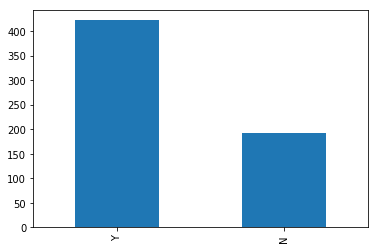

In [284]:
loan_train['Loan_Status'].value_counts().plot.bar()

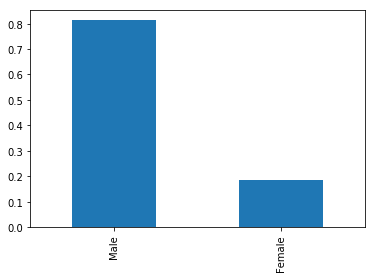

In [285]:
loan_train['Gender'].value_counts(normalize = True).plot.bar()

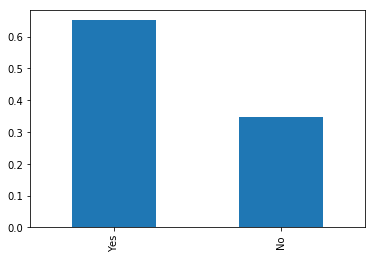

In [286]:
loan_train['Married'].value_counts(normalize = True).plot.bar()

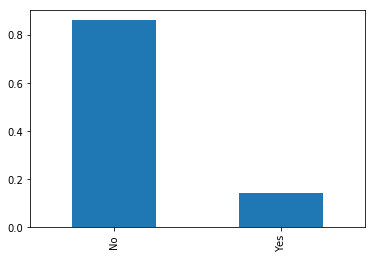

In [287]:
loan_train['Self_Employed'].value_counts(normalize = True).plot.bar()

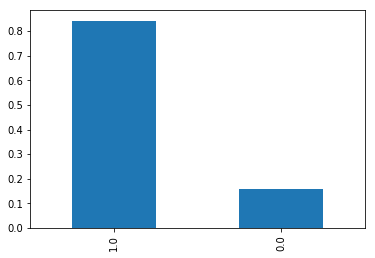

In [288]:
loan_train['Credit_History'].value_counts(normalize = True).plot.bar()

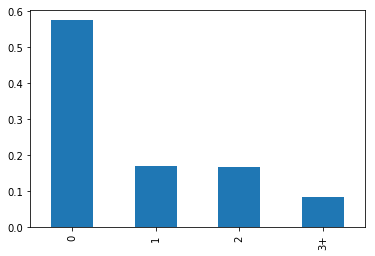

In [289]:
#Ordinal Variables
loan_train['Dependents'].value_counts(normalize = True).plot.bar()

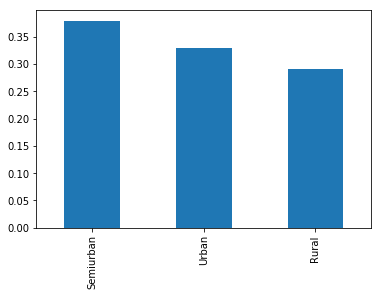

In [290]:
loan_train['Property_Area'].value_counts(normalize = True).plot.bar()

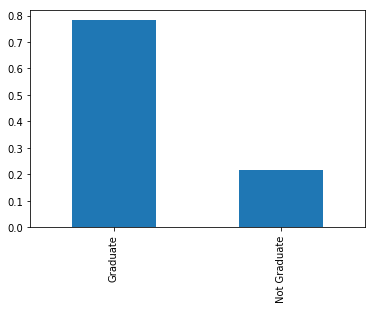

In [291]:
loan_train['Education'].value_counts(normalize = True).plot.bar()

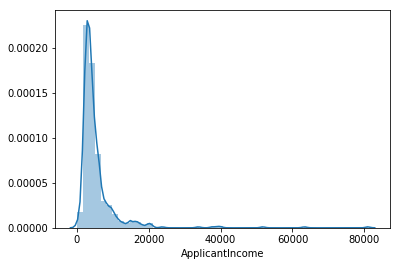

In [292]:
#Numerical variable
sns.distplot(loan_train['ApplicantIncome'])

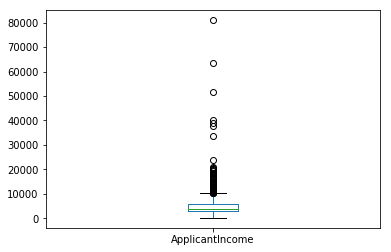

In [293]:
loan_train['ApplicantIncome'].plot.box()

Text(0.5,0.98,'')

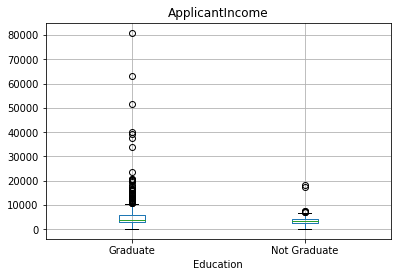

In [294]:
loan_train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

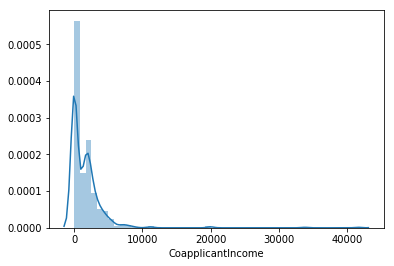

In [295]:
sns.distplot(loan_train['CoapplicantIncome']) 

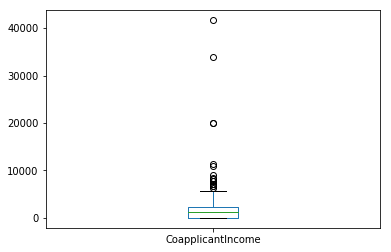

In [296]:
loan_train['CoapplicantIncome'].plot.box()

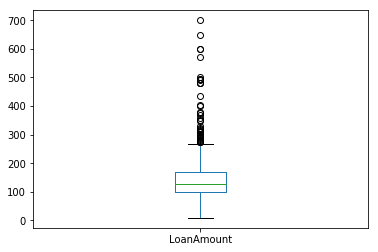

In [297]:
loan_train['LoanAmount'].plot.box()

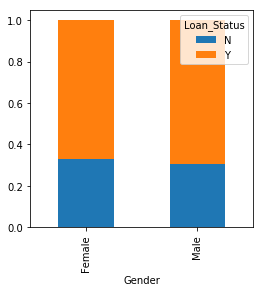

In [298]:
Gender=pd.crosstab(loan_train['Gender'],loan_train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

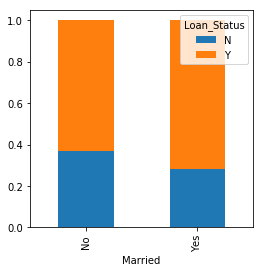

In [299]:
Married = pd.crosstab(loan_train['Married'],loan_train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))

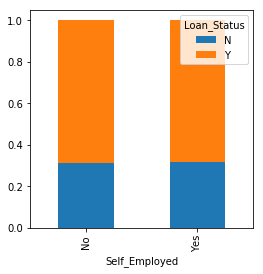

In [300]:
Self = pd.crosstab(loan_train['Self_Employed'],loan_train['Loan_Status'])
Self.div(Self.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))

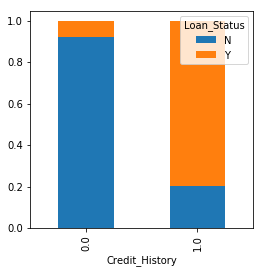

In [301]:
Credit_history = pd.crosstab(loan_train['Credit_History'],loan_train['Loan_Status'])
Credit_history.div(Credit_history.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))

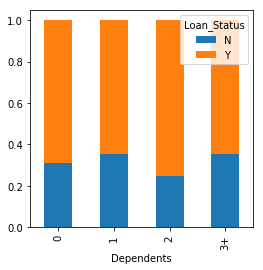

In [302]:
Dependents = pd.crosstab(loan_train['Dependents'],loan_train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))

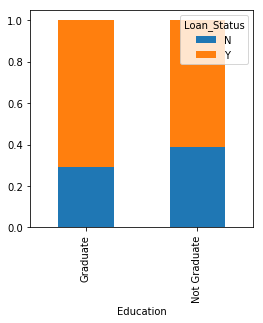

In [303]:
Education = pd.crosstab(loan_train['Education'],loan_train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))

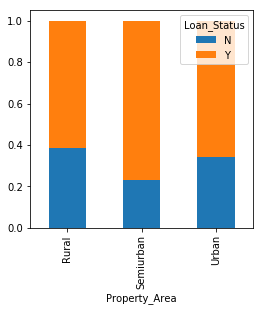

In [304]:
Property_Area = pd.crosstab(loan_train['Property_Area'],loan_train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))

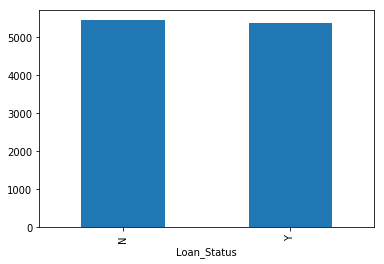

In [305]:
#Calculation Mean of Income
loan_train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [306]:
#Missing Values
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [307]:
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace = True)
loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace = True)
loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace = True)
loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0], inplace = True)
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0], inplace = True)

In [308]:
loan_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [309]:
loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mode()[0], inplace = True)

In [310]:
loan_train['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
128.0    11
113.0    11
130.0    10
96.0      9
95.0      9
70.0      8
115.0     8
112.0     8
150.0     7
135.0     7
136.0     7
132.0     7
125.0     7
104.0     7
80.0      6
81.0      6
138.0     6
90.0      6
158.0     6
116.0     6
175.0     6
144.0     6
155.0     6
180.0     6
152.0     5
         ..
315.0     1
101.0     1
73.0      1
142.0     1
48.0      1
164.0     1
83.0      1
191.0     1
166.0     1
495.0     1
59.0      1
214.0     1
240.0     1
72.0      1
42.0      1
349.0     1
280.0     1
405.0     1
279.0     1
304.0     1
650.0     1
436.0     1
78.0      1
54.0      1
89.0      1
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [311]:
loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].median(), inplace = True)

In [312]:
loan_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [313]:
#Fill Missing Values in Test Data Set
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0], inplace = True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0], inplace = True)
loan_test['Self_Employed'].fillna(loan_test['Self_Employed'].mode()[0], inplace = True)
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode()[0], inplace = True)
loan_test['Loan_Amount_Term'].fillna(loan_test['Loan_Amount_Term'].mode()[0], inplace = True)
loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].median(), inplace = True)

In [314]:
loan_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

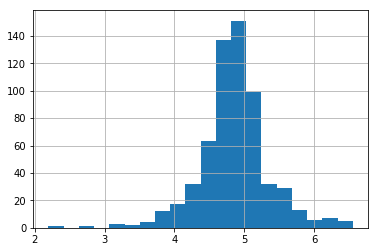

In [315]:
#Removing Outliers
loan_train['LoanAmount_log'] = np.log(loan_train['LoanAmount']) 
loan_train['LoanAmount_log'].hist(bins=20) 
loan_test['LoanAmount_log'] = np.log(loan_test['LoanAmount'])


In [316]:
loan_train = loan_train.drop(['Loan_ID'], axis = 1)
loan_test = loan_test.drop(['Loan_ID'], axis = 1)

In [317]:
X = loan_train.drop(['Loan_Status'], axis = 1)
y = loan_train['Loan_Status']

In [318]:
#Consider the “Gender” variable. It has two classes, Male and Female.
#As logistic regression takes only the numerical values as input, we have to change male and female into numerical value.
#Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female.
#Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.




X = pd.get_dummies(X)
loan_train = pd.get_dummies(loan_train)
loan_test = pd.get_dummies(loan_test)

In [319]:
#Model Building
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [320]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [321]:
#Here the C parameter represents inverse of regularization strength. 
#Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. 
#Smaller values of C specify stronger regularization. To learn about other parameters, refer 

In [322]:
y_pred = model.predict(X_train)

In [323]:
metrics.accuracy_score(y_train, y_pred)

0.8181818181818182

In [324]:
#Predicting for test dataset
test_pred = model.predict(loan_test)

In [325]:
submission=pd.read_csv("C:/Users/admn/Downloads/Submission.csv")

In [326]:
submission['Loan_Status']=test_pred 
submission['Loan_ID']=loan_test_copy['Loan_ID']

submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)


pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [327]:
log = pd.read_csv('logistic.csv')

In [328]:
log.head()

,Unnamed: 0,Loan_ID,Loan_Status
0,0,LP001015,Y
1,1,LP001022,Y
2,2,LP001031,Y
3,3,LP001035,Y
4,4,LP001051,Y
